# Generating Poems Using Natural Language Processing (NLP) with Python

The Ultimate Guide for Text Generation and Summarization by Predicting the Next Set of Words using LSTM.

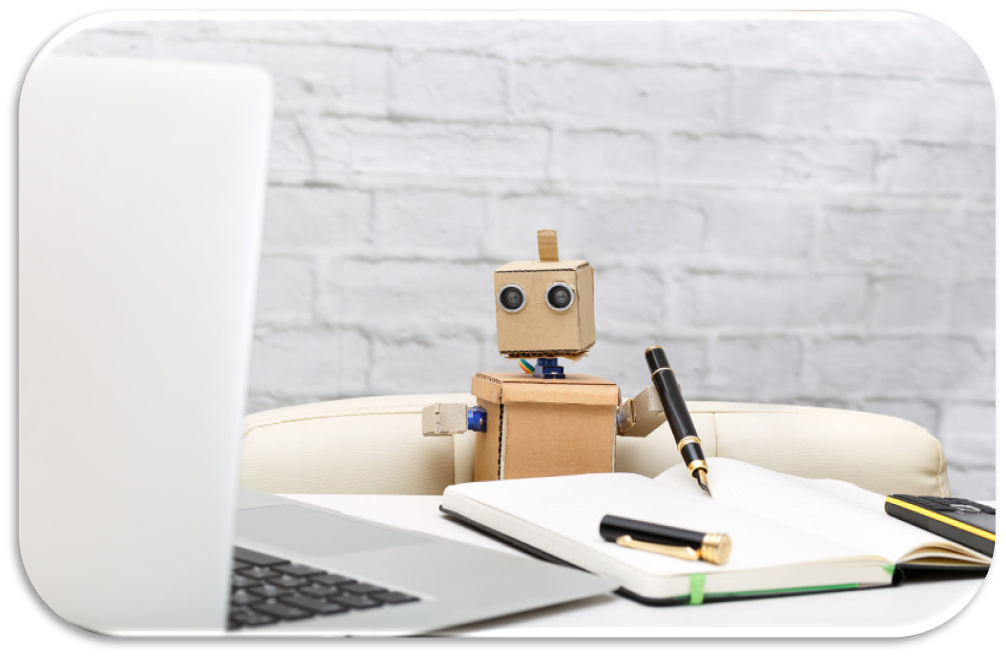

## Introduction

Natural Language Processing (NLP) is an emerging field and a subset of machine learning which aims to train computers to understand human languages. The most common application of NLP is Text Generation and Summarization.

Text generation comes in handy in the world of creative arts through songwriting, poems, short stories, and novels.

In this project, I will demonstrate and show how we can harness the power of Natural Language Processing (NLP) with Deep Learning by building and training a neural network that generates poems and predicts the next set of words from the seed text using LSTM.


## Steps to Implement Text Generation with LSTM Neural Networks in Python with Keras and NLTK

1.	Problem Statement
2.	Importing Libraries
3.	Loading the Data
4.	Data Pre-processing
5.	Tokenize the Data
6.	Model Building
7.	Model Evaluation Results: Accuracy and Loss
8.	Predicting the next 25 words in a Poem


## 1.	Problem Statement

The objective of this task is that we are given a Gutenberg Dataset and use the book 'blake-poems.txt' file corpus as the source text.

Using this data, we need to train a neural network model that generates poems by predicting the next set of words from the seed text in a Poem using LSTM, Keras and NLTK.

**Why LSTM?**

LSTM stands for long short-term memory, and it is a building unit for layers of a recurrent neural network. The LSTM unit is made of a cell, an input, an output and a forget gate.

These are responsible for memorizing over a certain time, where the gates regulate how much of the data is kept and can have a memory about the previous data. Hence it can generate a new pattern using previous data.

LSTMs are mainly used for text generation, and it’s preferred over RNNs because of RNNs vanishing and exploding gradients problems.

## 2.	Importing Libraries

•	NLTK: It is a toolkit built for working with NLP in Python which contains text processing libraries for tokenization, parsing, classification etc.

•	Keras: It is a powerful and easy-to-use free open-source Python library and high-level API for developing and evaluating deep learning models.


In [ ]:
# import python libraries
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout,Embedding, LSTM
from tensorflow.keras.utils import to_categorical
from random import randint
import re
import nltk
from nltk.corpus import gutenberg as gut
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from nltk.translate.bleu_score import sentence_bleu

## 3.	Loading the Dataset

- Download the Gutenberg dataset from NLTK
- Print the name of the files in the dataset
- Get the book 'blake-poems.txt' text file from NLTK


In [ ]:
#Download the Gutenberg dataset from NLTK
nltk.download('gutenberg')

In [ ]:
from numpy.random import seed
seed(100)
import tensorflow
tensorflow.random.set_seed(100)

In [ ]:
#Print the name of the files in the dataset
print(gut.fileids())   

#Get the book 'blake-poems.txt' text file from NLTK
book_text = nltk.corpus.gutenberg.raw('blake-poems.txt')


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


## 4.	Data Pre-processing

The pre-processing of the text data is an essential step as it makes it easier to extract information from the text and apply deep learning algorithms to it.  

The objective of this step is to Inspect data and clean noise that is irrelevant such as punctuation, special characters, numbers, and terms that don’t carry much weightage in context to the text.

We will perform some basic text pre-processing on the text like Remove punctuations and numbers, Single character removal, removing multiple spaces, limiting text to 5000 etc. so that text is good enough to build the required model on.


In [ ]:
# Data preprocessing
def preprocess_text(sen):

  # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

  # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    
  # Removing multiple spaces  
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence.lower()

 # limit text to 5000 words
book_text = preprocess_text(book_text)
book_text = book_text[:5000] 

In [ ]:
print(book_text)

 poems by william blake songs of innocence and of experience and the book of thel songs of innocence introduction piping down the valleys wild piping songs of pleasant glee on cloud saw child and he laughing said to me pipe song about lamb so piped with merry cheer piper pipe that song again so piped he wept to hear drop thy pipe thy happy pipe sing thy songs of happy cheer so sang the same again while he wept with joy to hear piper sit thee down and write in book that all may read so he vanish from my sight and pluck a hollow reed and made rural pen and stain the water clear and wrote my happy songs every child may joy to hear the shepherd how sweet is the shepherd sweet lot from the morn to the evening he stays he shall follow his sheep all the day and his tongue shall be filled with praise for he hears the lambs innocent call and he hears the ewes tender reply he is watching while they are in peace for they know when their shepherd is nigh the echoing green the sun does arise and ma

In [ ]:
print(len(book_text))

5000


## 5.	Tokenization

As we all know machine learning and neural networks algorithms cannot work on text data directly, they simply don’t recognize it. 

Hence, we need to convert our words in the sentences to numerical values such that our model can figure out what exactly is going on.

For this purpose, especially, in Natural Language Processing (NLP), “Tokenization” plays are vital role.

Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.
 
Tokenization serves as the base of almost every possible model based on NLP. It just assigns each unique word a different number which we can check out by printing tokenizer.word_index.


In [ ]:
#convert words to numbers
book_text_words = (word_tokenize(book_text))
n_words = len(book_text_words)
unique_words = len(set(book_text_words))

In [ ]:
print(book_text_words)

['poems', 'by', 'william', 'blake', 'songs', 'of', 'innocence', 'and', 'of', 'experience', 'and', 'the', 'book', 'of', 'thel', 'songs', 'of', 'innocence', 'introduction', 'piping', 'down', 'the', 'valleys', 'wild', 'piping', 'songs', 'of', 'pleasant', 'glee', 'on', 'cloud', 'saw', 'child', 'and', 'he', 'laughing', 'said', 'to', 'me', 'pipe', 'song', 'about', 'lamb', 'so', 'piped', 'with', 'merry', 'cheer', 'piper', 'pipe', 'that', 'song', 'again', 'so', 'piped', 'he', 'wept', 'to', 'hear', 'drop', 'thy', 'pipe', 'thy', 'happy', 'pipe', 'sing', 'thy', 'songs', 'of', 'happy', 'cheer', 'so', 'sang', 'the', 'same', 'again', 'while', 'he', 'wept', 'with', 'joy', 'to', 'hear', 'piper', 'sit', 'thee', 'down', 'and', 'write', 'in', 'book', 'that', 'all', 'may', 'read', 'so', 'he', 'vanish', 'from', 'my', 'sight', 'and', 'pluck', 'a', 'hollow', 'reed', 'and', 'made', 'rural', 'pen', 'and', 'stain', 'the', 'water', 'clear', 'and', 'wrote', 'my', 'happy', 'songs', 'every', 'child', 'may', 'joy', 

In [ ]:
print(n_words)

1007


In [ ]:
print(unique_words)

388


keras,word_index is the dictionary. Store the number of unique words in vocab_size variable, store the dictionary in the variable called word_2_index.

In [ ]:
tokenizer = Tokenizer(num_words=unique_words)
tokenizer.fit_on_texts(book_text_words)

vocab_size = len(tokenizer.word_index) + 1
word_2_index = tokenizer.word_index  

Create the input sequences, input sequences in words (used for metric evaluation later on), empty list to hold the sequences that will be input into our model, empty list to hold the output words, 25 is the length of the input sequence.

In [ ]:
# input sequences in words (used for metric evaluation later on)
# empty list to hold the sequences that will be input into our model
# empty list to hold the output words
# length of the input sequence
input_sequence_words = []
input_sequence = [] 
output_words = []  
input_seq_length = 25
for i in range(0, n_words - input_seq_length , 1):
    in_seq = book_text_words[i:i + input_seq_length]
    input_sequence_words.append(in_seq)
    out_seq = book_text_words[i + input_seq_length]
    input_sequence.append([word_2_index[word] for word in in_seq])
    output_words.append(word_2_index[out_seq])

reshape the input sequences to be 3-dimensional

In [ ]:
X = np.reshape(input_sequence, (len(input_sequence), input_seq_length, 1))

Normalise the data by dividing by the max number of unique words (the vocab size)
X = X / float(vocab_size)
one-hot encode the output words so that they can be used by the model (converts the output to 2-dimensions)

In [ ]:
y = to_categorical(output_words)

## 6.	Model Building

a)	Defining the LSTM Neural Network Model

- we will use an Embedding Layer to learn the representation of words, and a Long Short-Term Memory (LSTM) recurrent neural network to learn to predict words based on their context and we use 50 as the size of the embedding vector space.
- We will use two LSTM hidden layers with 256 memory units each. More memory cells and a deeper network may achieve better results.
- Dropout is a regularization method, where a proportion of nodes in the layer are randomly ignored by setting their weights to zero for each training sample. This technique also improves generalization and reduces overfitting. Hence, to avoid that we will be using a Dropout layer with a probability of 20%.
- The output layer predicts the next word as a single vector the size of the vocabulary with a probability for each word in the vocabulary.
- SoftMax activation function is used to ensure the outputs have the characteristics of normalized probabilities.


In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=X.shape[1]))
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 50)            19450     
                                                                 
 lstm (LSTM)                 (None, 25, 256)           314368    
                                                                 
 dropout (Dropout)           (None, 25, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 389)               99973     
                                                                 
Total params: 959,103
Trainable params: 959,103
Non-trai

b)	Compiling the LSTM Model

Once our layers are added to the model, we need to set up a score function, a loss function, and an optimization algorithm.
- Loss function:  To measure how poorly our model performs on images with known labels and we will use “categorical_crossentropy".
- Optimizer: This function will iteratively improve parameters to minimize the loss. We will go with the "Adam" optimizer.
- Evaluation Metric:  "Accuracy" is used to evaluate the LSTM model's performance.
- Learning rate: The amount of change to the model during each step of this search process, or the step size. The learning rate hyperparameter controls the rate or speed at which the model learns.  We will use 0.001 as the learning rate for the LSTM model.


In [ ]:
learn_rate = 0.001
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = learn_rate)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

c)	Model Training 

To start training, we will use the “model.fit” method to train the data and parameters with epochs = 200 and batch_size=64.

We have trained the model using 200 epochs and got a loss of 0.0287 and an accuracy of 100%.


In [ ]:
history = model.fit(X, y, batch_size=64, epochs=200, verbose=2)

Epoch 1/200
16/16 - 10s - loss: 5.8514 - accuracy: 0.0499 - 10s/epoch - 621ms/step
Epoch 2/200
16/16 - 0s - loss: 5.4949 - accuracy: 0.0519 - 416ms/epoch - 26ms/step
Epoch 3/200
16/16 - 0s - loss: 5.3955 - accuracy: 0.0611 - 426ms/epoch - 27ms/step
Epoch 4/200
16/16 - 0s - loss: 5.3858 - accuracy: 0.0692 - 406ms/epoch - 25ms/step
Epoch 5/200
16/16 - 0s - loss: 5.3722 - accuracy: 0.0621 - 395ms/epoch - 25ms/step
Epoch 6/200
16/16 - 0s - loss: 5.3707 - accuracy: 0.0692 - 397ms/epoch - 25ms/step
Epoch 7/200
16/16 - 0s - loss: 5.3788 - accuracy: 0.0631 - 434ms/epoch - 27ms/step
Epoch 8/200
16/16 - 0s - loss: 5.3593 - accuracy: 0.0580 - 398ms/epoch - 25ms/step
Epoch 9/200
16/16 - 0s - loss: 5.3486 - accuracy: 0.0703 - 438ms/epoch - 27ms/step
Epoch 10/200
16/16 - 0s - loss: 5.3554 - accuracy: 0.0570 - 394ms/epoch - 25ms/step
Epoch 11/200
16/16 - 0s - loss: 5.3297 - accuracy: 0.0764 - 409ms/epoch - 26ms/step
Epoch 12/200
16/16 - 0s - loss: 5.2953 - accuracy: 0.0642 - 422ms/epoch - 26ms/step
E

In [ ]:
#Model Accuracy Results
print("Results:")
print("-----------------------------\n")
results = model.evaluate(X, y, verbose=2)
print("Model Accuracy: %.2f%%" % (results[1] * 100))
print('Model Loss: ', (results[0]))

Results:
-----------------------------

31/31 - 1s - loss: 0.0287 - accuracy: 1.0000 - 1s/epoch - 40ms/step
Model Accuracy: 100.00%
Model Loss:  0.02874165028333664


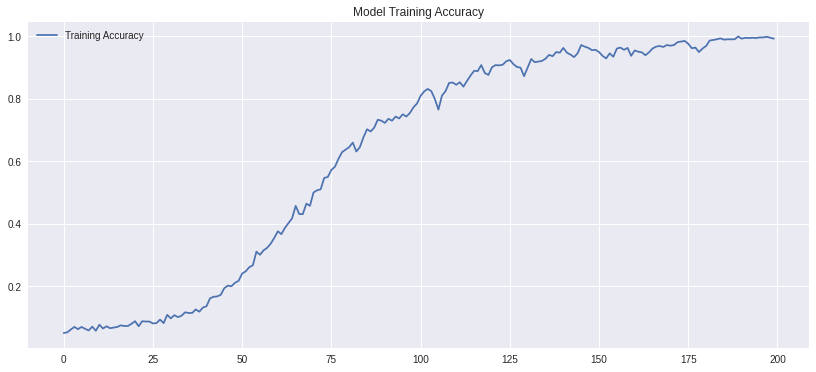

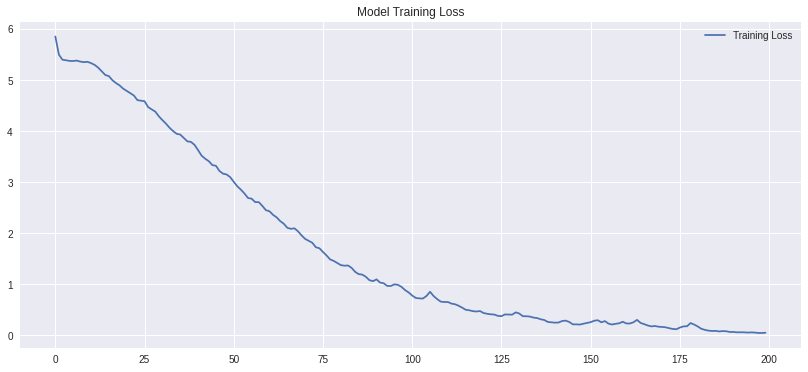

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.figure(figsize=(14,6))
plt.plot(epochs, acc, label='Training Accuracy')
plt.title('Model Training Accuracy')
plt.legend()

plt.figure(figsize=(14,6))
plt.plot(epochs, loss, label='Training Loss')
plt.title('Model Training Loss')
plt.legend()

plt.show()

## 7.	Predicting the Next 25 Words of a Poem

Finally, we will input a seed text which will be the origin from which the poem will be generated and set the next words to 25. 

In [ ]:
random_seq_index = np.random.randint(0, len(input_sequence)-1) 
random_seq = input_sequence[random_seq_index] 

convert the integer sequence to its words, get the list of words that correspond to the integers in the randomly picked sequence.

In [ ]:
index_2_word = dict(map(reversed, word_2_index.items()))
seed_word_sequence = [index_2_word[value] for value in random_seq]

join the words in the list and print the sequence of words, this prints the words from the randomly picked sequence that will be the seed for our prediction

Predict next 25 words,  reshape to make 3-D input (1 sequence, length of the sequence, 1 because the first LSTM requires another dimension)
int_sample = int_sample / float(vocab_size) normalise (as we normalised the training data)

In [ ]:
#Poem 1
word_sequence = []
for i in range(25):
    int_sample = np.reshape(random_seq, (1, len(random_seq), 1))    
    predicted_word_index = model.predict(int_sample, verbose=0)
    predicted_word_id = np.argmax(predicted_word_index) 
    word_sequence.append(index_2_word[ predicted_word_id]) 
    random_seq.append(predicted_word_id) 
    random_seq = random_seq[1:len(random_seq)]  


In [ ]:
seq = [' '.join(w) for w in input_sequence_words]
reference = seq
candidate = ' '.join(word_sequence) 
score = sentence_bleu(reference, candidate)
print('Seed word sequence: %s'%(' '.join(seed_word_sequence)))
print('Predicted words: %s'%(candidate))
print('BLEU Score for predicted words: %s'%(score))

Seed word sequence: gives his light and gives his heat away and flowers and trees and beasts and men receive comfort in morning joy in the noonday and
Predicted words: we are put on earth little space that we may learn to bear the beams of love and these black bodies and this sunburnt face
BLEU Score for predicted words: 1.0


In [ ]:
#Poem 2
word_sequence = []
for i in range(25):
    int_sample = np.reshape(random_seq, (1, len(random_seq), 1))    
    predicted_word_index = model.predict(int_sample, verbose=0)
    predicted_word_id = np.argmax(predicted_word_index) 
    word_sequence.append(index_2_word[ predicted_word_id]) 
    random_seq.append(predicted_word_id) 
    random_seq = random_seq[1:len(random_seq)]  

In [ ]:
seq = [' '.join(w) for w in input_sequence_words]
reference = seq
candidate = ' '.join(word_sequence) 
score = sentence_bleu(reference, candidate)
print('Seed word sequence: %s'%(' '.join(seed_word_sequence)))
print('Predicted words: %s'%(candidate))
print('BLEU Score for predicted words: %s'%(score))

Seed word sequence: gives his light and gives his heat away and flowers and trees and beasts and men receive comfort in morning joy in the noonday and
Predicted words: is but cloud and like shady grove for when our souls have learn the heat to bear the cloud will vanish we shall hear his
BLEU Score for predicted words: 1.0


In [ ]:
#Poem 3
word_sequence = []
for i in range(25):
    int_sample = np.reshape(random_seq, (1, len(random_seq), 1))    
    predicted_word_index = model.predict(int_sample, verbose=0)
    predicted_word_id = np.argmax(predicted_word_index) 
    word_sequence.append(index_2_word[ predicted_word_id]) 
    random_seq.append(predicted_word_id) 
    random_seq = random_seq[1:len(random_seq)]

In [ ]:
seq = [' '.join(w) for w in input_sequence_words]
reference = seq
candidate = ' '.join(word_sequence) 
score = sentence_bleu(reference, candidate)
print('Seed word sequence: %s'%(' '.join(seed_word_sequence)))
print('Predicted words: %s'%(candidate))
print('BLEU Score for predicted words: %s'%(score))

Seed word sequence: gives his light and gives his heat away and flowers and trees and beasts and men receive comfort in morning joy in the noonday and
Predicted words: voice saying come out from the grove my love and care and round my golden tent like lambs rejoice thus did my mother say and
BLEU Score for predicted words: 1.0


## 8. Conclusion

In this blog, we discussed how to implement a neural network that generates poems and predicts the next set of words from the seed text using LSTM, Keras and NLTK. 

Though some parts of the poem sound meaningless, the model can be tweaked to gain higher accuracy, lower loss, and predict more meaningful poems.
